In [1]:
# import Python packages
import biom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns

In [2]:
# read in biom table
table = biom.load_table("../data/go.filt.biom")
table = table.to_dataframe().T
table.head()

,GO:0000014,GO:0000015,GO:0000027,GO:0000030,GO:0000034,GO:0000036,GO:0000041,GO:0000049,GO:0000062,GO:0000103,...,GO:1904047,GO:1904680,GO:1990077,GO:1990397,GO:1990610,GO:1990904,GO:2001059,GO:2001061,GO:2001070,GO:2001295
14365.Con.feces.13,0.0,1538.0,58.0,254.0,10.0,177.0,145.0,8719.0,0.0,792.0,...,569.0,1344.0,8514.0,596.0,536.0,9055.0,32.0,12.0,4483.0,3457.0
14365.Con.feces.10,0.0,705.0,27.0,48.0,18.0,72.0,47.0,4340.0,0.0,247.0,...,247.0,686.0,4333.0,480.0,338.0,4972.0,50.0,8.0,2231.0,1721.0
14365.Con.feces.12,0.0,1956.0,78.0,457.0,10.0,177.0,269.0,10190.0,0.0,946.0,...,512.0,1437.0,9306.0,734.0,579.0,9802.0,12.0,14.0,5015.0,3501.0
14365.Con.feces.11,0.0,1643.0,112.0,654.0,98.0,183.0,340.0,9613.0,0.0,1213.0,...,371.0,637.0,6285.0,445.0,504.0,5064.0,165.0,6.0,3341.0,2261.0
14365.Con.feces.14,4.0,1998.0,30.0,89.0,5.0,248.0,60.0,13208.0,0.0,888.0,...,837.0,2203.0,14162.0,1121.0,816.0,15008.0,18.0,30.0,8475.0,5720.0


In [3]:
# read in metadata
md = pd.read_table("../data/metadata.filt.tsv", sep="\t", index_col=0)
md.head()

,anonymized_name,collection_timestamp,description,dna_extracted,elevation,empo_1,empo_2,empo_3,env_biome,env_feature,...,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,tube_id,mouse_type,sampling_depth
sample_name,,,,,,,,,,,,,,,,,,,,,
14365.Wound.feces.31,WC31,2021-11-23 09:59:59.995000,mouse fecal sampleWound.feces.31,True,193,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,True,14365,feces,mouse gut metagenome,female,410661,Skin Gut axis,63,wound,3570735.0
14365.Vanco.feces.27,VC27,2021-11-23 09:59:59.995000,mouse fecal sampleVanco.feces.27,True,193,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,True,14365,feces,mouse gut metagenome,female,410661,Skin Gut axis,91,vancomycin,13812869.0
14365.Wound.feces.3,WC3,2021-11-23 09:59:59.995000,mouse fecal sampleWound.feces.3,True,193,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,True,14365,feces,mouse gut metagenome,female,410661,Skin Gut axis,35,wound,1094969.0
14365.Vanco.feces.9,VC9,2021-11-23 09:59:59.995000,mouse fecal sampleVanco.feces.9,True,193,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,True,14365,feces,mouse gut metagenome,female,410661,Skin Gut axis,73,vancomycin,123649.0
14365.Con.feces.4,CC4,2021-11-23 09:59:59.995000,mouse fecal sampleCon.feces.4,True,193,Host-associated,Animal,Animal distal gut,urban biome,animal-associated habitat,...,True,14365,feces,mouse gut metagenome,female,410661,Skin Gut axis,4,control,172350.0


In [4]:
go_annot = pd.read_table("../reference/go_annot.txt", sep="\t", index_col=0, header=None)
go_annot.columns = ["description"]
go_annot.index.name = "term"
go_annot.head()

,description
term,
GO:0000001,mitochondrion inheritance
GO:0000002,mitochondrial genome maintenance
GO:0000003,reproduction
GO:0000006,high-affinity zinc transmembrane transporter a...
GO:0000007,low-affinity zinc ion transmembrane transporte...


In [5]:
diff = pd.read_table("../data/functional_diff_ab.tsv", sep="\t", index_col=0)
col_map = {
    "C(mouse_type, Treatment('control'))[T.vancomycin]": "beta_vancomycin",
    "C(mouse_type, Treatment('control'))[T.wound]": "beta_wound"
}
diff = diff.rename(columns=col_map)
diff = diff.sort_values(by="beta_wound", ascending=True)
diff = diff.join(go_annot, how="inner")
print(diff.shape)
diff.head()

(2201, 4)


,Intercept,beta_vancomycin,beta_wound,description
GO:0033573,0.349173,0.522271,-6.115911,high-affinity iron permease complex
GO:0015473,0.924130,1.443289,-6.038005,fimbrial usher porin activity
GO:0009297,0.835132,1.599510,-5.933961,pilus assembly
GO:0009289,0.538042,1.308044,-5.933566,pilus
GO:0009338,0.235264,1.504460,-5.746007,exodeoxyribonuclease V complex


In [6]:
# create color palette
mouse_types = ["control", "vancomycin", "wound"]
palette = dict(zip(
    mouse_types,
    sns.color_palette("colorblind", len(mouse_types))
))

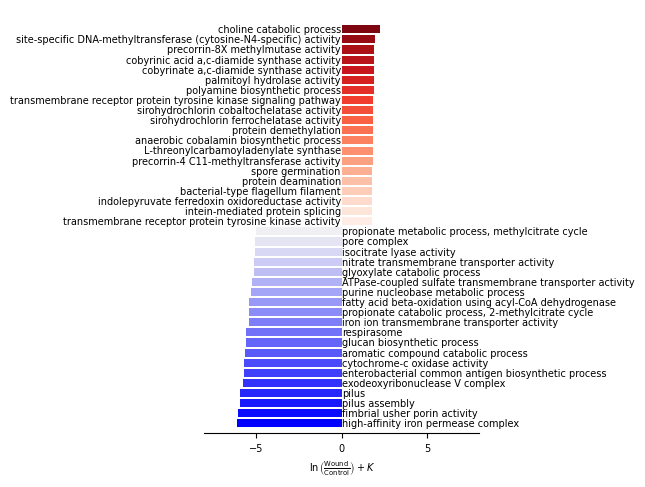

In [7]:
# create functional differential abundance plot
mm = 1/25.4
fig, ax = plt.subplots(1, 1, figsize=(90*mm, 140*mm))

n = 20
df = pd.concat([diff.head(n), diff.tail(n)])
colors = sns.light_palette("Blue", n)[::-1] + sns.color_palette("Reds", n)

ax.barh(
    y=np.arange(n*2),
    width=df["beta_wound"],
    color=colors,
    linewidth=0.5
)

for i, (go_term, row) in enumerate(df.iterrows()):
    text_align = "left" if i < n else "right"
    sign = 1 if i < n else -1
    ax.text(
        y=i,
        x=sign*0.05,
        s=row["description"],
        ha=text_align,
        va="center",
        fontsize=7,
    )
    
ax.yaxis.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylim([-1, n*2+1])
ax.set_xlim([-8, 8])
ax.set_xlabel(r"$\ln\left(\frac{\mathrm{Wound}}{\mathrm{Control}}\right) + K$", fontsize = 7)
plt.xticks(fontsize=7)

plt.savefig("../plots/Fig_3E_functional_diff_ab.png", dpi = 600)
plt.show()